In [1]:
import pandas as pd
# This allows us to be able to import and use data from csv files

In [2]:

from matplotlib import pyplot as plt
# This allows us to make charts


In [3]:
data = pd.read_csv('Fremont_Bikes.csv', index_col = 'Date', parse_dates = True)
#parse_dates = True changes dates from strings to actual dates that we can use to manipulate
data.head()
# This outputs just a few rows of the data

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


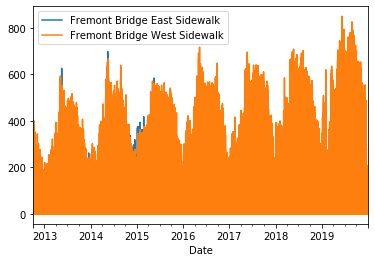

In [4]:
# Visualizing the data
%matplotlib inline
data.plot()

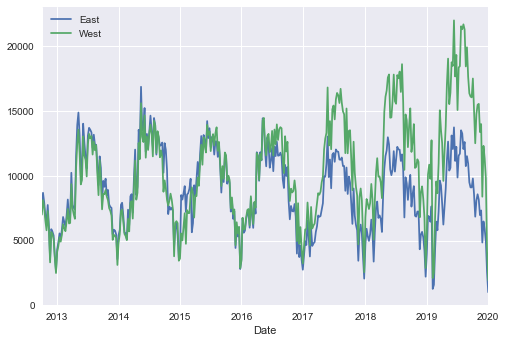

In [5]:
plt.style.use('seaborn')
# We use this for the style module in matplotlib and select 'seaborn' styling
data.columns = ['East', 'West']
# Chaning the legends to shorter names
data.resample('W').sum().plot();
# We resample to weekly number of rides over the years and plot that instead

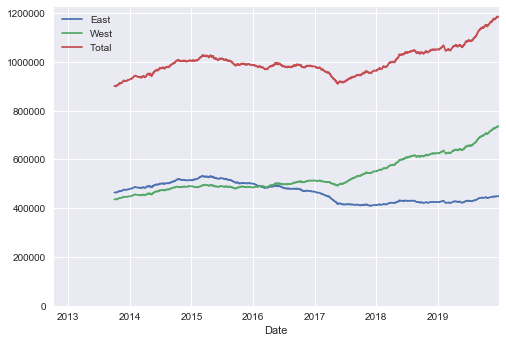

In [6]:
data['Total'] = data['West'] + data['East']
# We now want to observe annual trends using a rolling window
ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0, None);

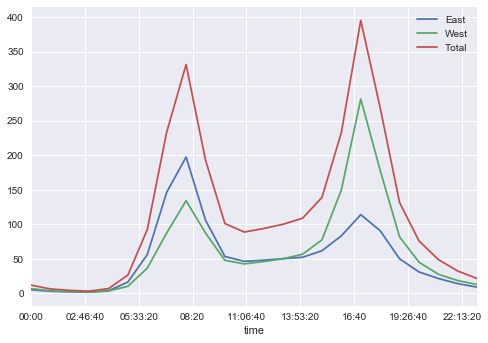

In [7]:
data.groupby(data.index.time).mean().plot();

In [8]:
pivoted = data.pivot_table('Total', index = data.index.time, columns=data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


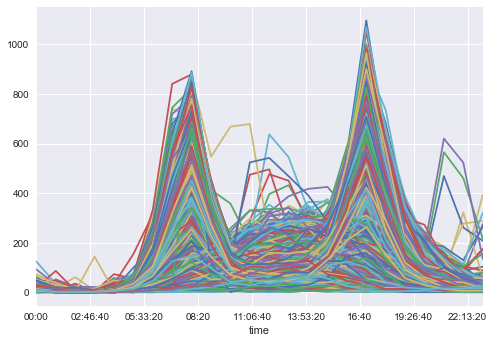

In [9]:
pivoted.plot(legend=False);

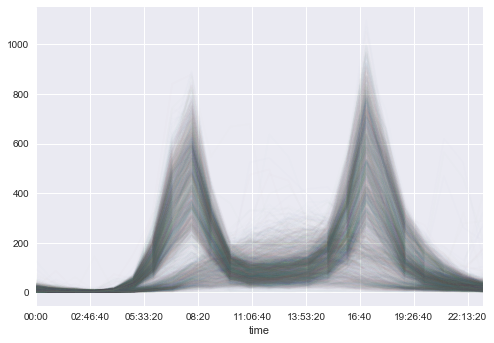

In [10]:
pivoted.plot(legend=False, alpha=0.01);